# Instructions for use

------
#### 1. Необходимые для нормального функционирования модули и библиотеки
* SD модуль, сожержащий классы всех операторов дифференцирования по пространству
* TD операторов дифференцирвания по времени
* SA модули, содержащий классы различных анализаторов схем (пока без блочных)
* MBM модуль для быстрого создания и работы с блочными сетками

In [1]:
#-ПОДКЛЮЧЕНИЕ-МОДУЛЕЙ-И-БИБЛИОТЕК-
%matplotlib notebook

import numpy              as np
import matplotlib.pyplot  as plt
import moviepy.editor     as mpy00
import scipy
import glob
import nbimporter
import math

from scipy                import sparse
from scipy.sparse         import linalg
from numpy                import pi, sin, cos, ma
from pylab                import *
from mpl_toolkits.mplot3d import Axes3D
from matplotlib           import cm
from matplotlib.ticker    import LinearLocator, FormatStrFormatter
from matplotlib           import animation

import SpaceDifferentiationOperators as SD 
import TimeDifferentiationOperators  as TD
import SchemeAnalysis                as SA
import MeshBlocksMethods             as MBM

#### 2. Пример реализации схемы на одном блоке
1. Выставляем параметры схемы (левый и правый края сетки, количество узлов сетки, максимальное время счета и число шагов по времени, скорость)
2. Генерация сеток (атрибуты объекта - mesh (сетка) и PHI (сеточная функция))
3. Генерируем необходимые дифференциальные операторы (оператор по пространству принимает: края сетки, количество узлов в ней, скорость) (оператор по времени: максимальное время счета, число точек на временном отрезке, оператор простарнственного дифференцирования)
4. Задаем начальные условия, методами DefineIC (если хотим ввести их сами) или DefineICstandart для быстрой инициализации стандартными шаблонами
5. Дифференируем полученными оператором сеточную фукнцию
6. Визуализируем результат

In [14]:
#1-----
xmax = 2
xmin = 0
cx   = 100
tmax = 2
ct   = 200
v    = 1

#2-----
B = MBM.Block1(xmin, xmax, cx, ct)

#3-----
D = SD.SBP21PROJ(xmin, xmax, cx+1, v)
T = TD.RK4(tmax, ct, D)

#4-----
B.DefineICstandart('gauss')

#5-----
T.diff(B.PHI)

<IPython.core.display.Javascript object>


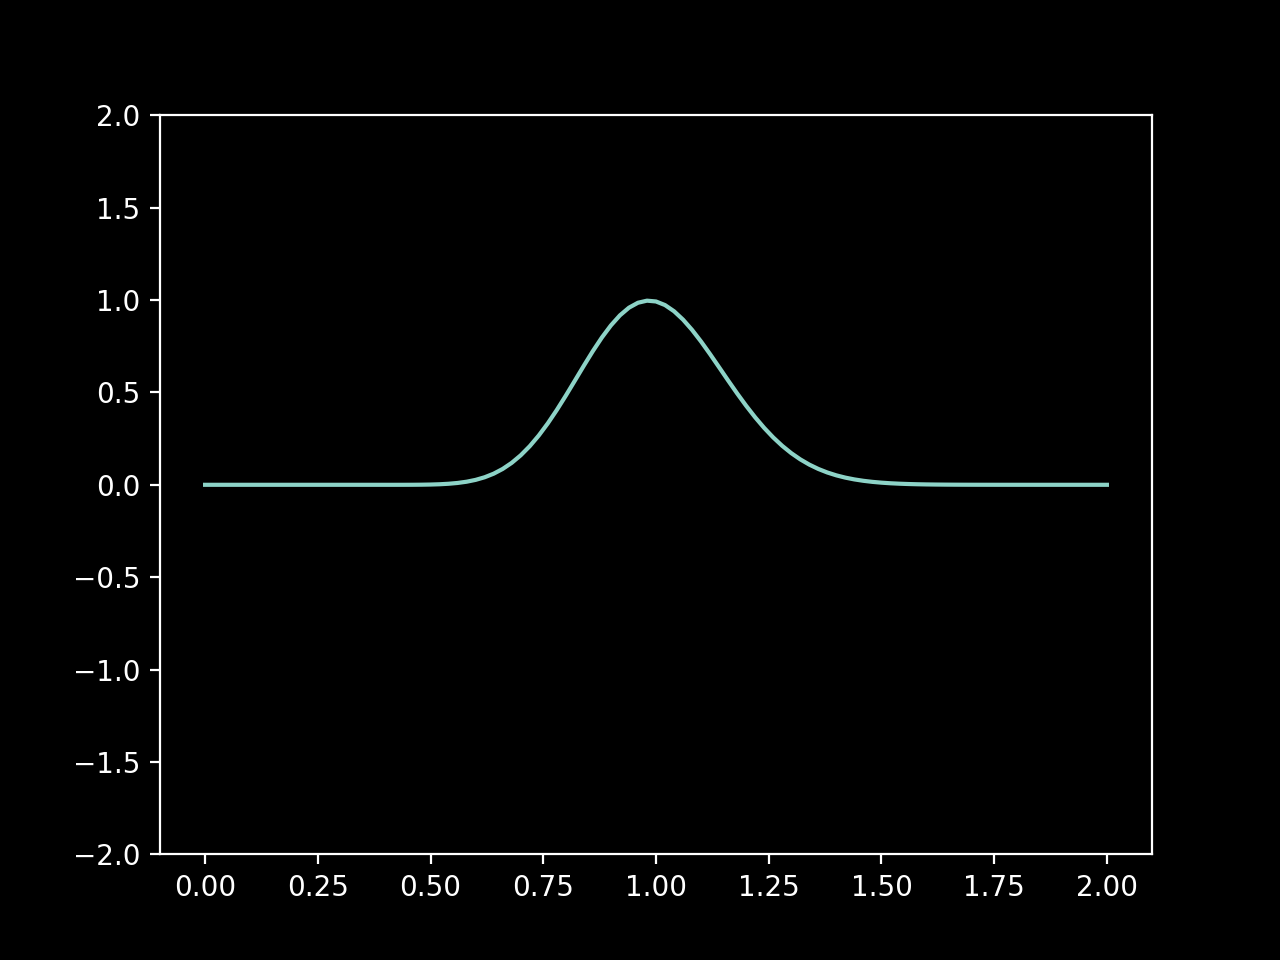

In [15]:
#6-----
fig, ax = plt.subplots()
plt.style.use('dark_background')
surf = ax.plot(B.mesh,B.PHI[0])

def animate(n):
    plt.style.use('dark_background')
    ax.clear()
    ax.set_ylim(-2,2)
    surf = ax.plot(B.mesh,B.PHI[n])
    return surf

anim = animation.FuncAnimation(fig, animate, frames=B.PHI[:,0].size, interval=1, repeat = False)

#### 3. Пример реализации схемы на двублочной сетке
Делаем все аналогично, изменения касабются лишь дифференциального оператора, в который надо передавать параметры для обоих блоков и самого определния блоков

Замечание: в блоки передается число промежутков разбиения, а в оператор дифференцирования число узлов сетки (их на 1 больше)

In [2]:
#1-----
xmax = 2
sep  = 1 #Точка разделения
xmin = 0
cxl  = 40
cxr  = 80
tmax = 2
ct   = 100
v    = 1

#2-----
B = MBM.Block2(cxl, cxr, xmin, xmax, sep, ct)

#3-----
D = SD.SBP42SAT_2BLOCKS(xmin, xmax, sep, cxl+1, cxr+1, v)
T = TD.RK4(tmax, ct, D)

#4-----
B.DefineICstandart('gauss')

#5-----
T.diff(B.PHI)

<IPython.core.display.Javascript object>


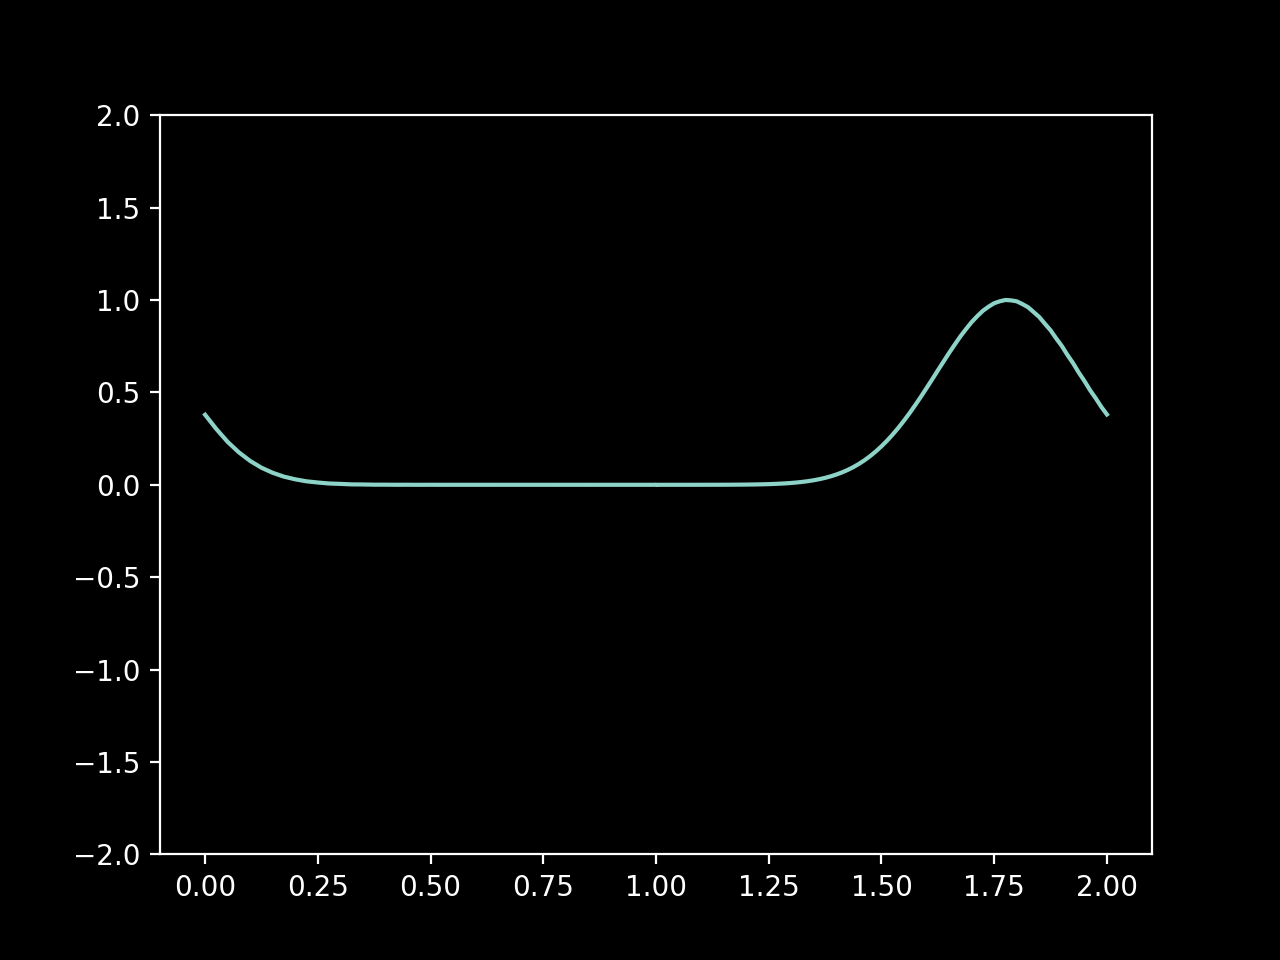

In [26]:
#6-----
fig, ax = plt.subplots()
plt.style.use('dark_background')
surf = ax.plot(B.mesh,B.PHI[0])

def animate(n):
    plt.style.use('dark_background')
    ax.clear()
    ax.set_ylim(-2,2)
    surf = ax.plot(B.mesh,B.PHI[n])
    return surf

anim = animation.FuncAnimation(fig, animate, frames=B.PHI[:,0].size, interval=1, repeat = False)

#### 3. Анализ ошибок
1. после расчета, если вычисления производились по целому числу периодов, можно посмотреть отклонение от начального условия для этого в SA есть метод ICError

l2-norm: 0.3683568319832105


<IPython.core.display.Javascript object>


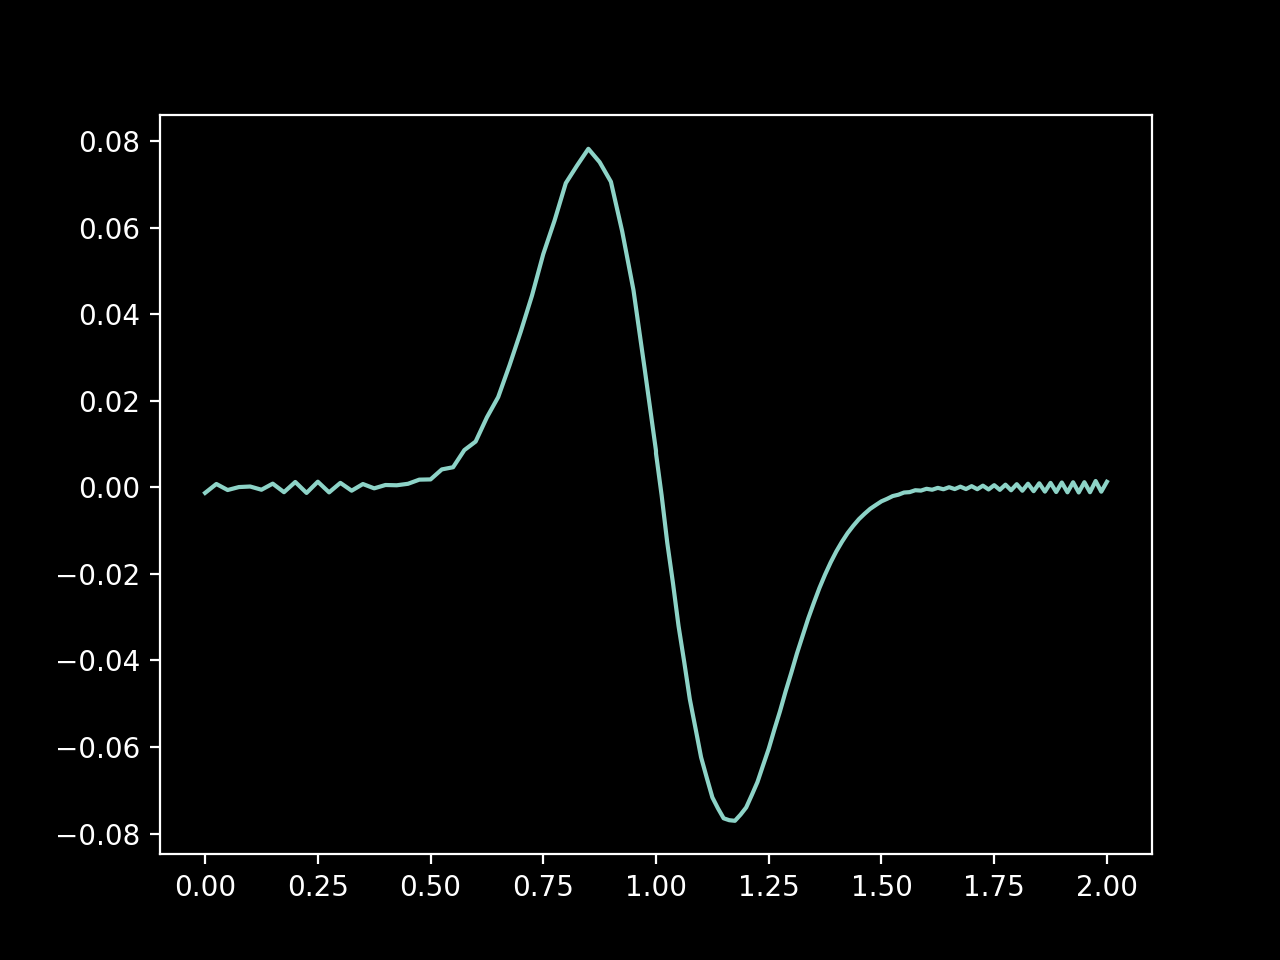

array([-1.28302120e-03,  7.78920979e-04, -6.17863083e-04,  6.48256938e-05,
        1.93531893e-04, -5.50856312e-04,  8.55608654e-04, -1.11452159e-03,
        1.23895936e-03, -1.28703366e-03,  1.30246322e-03, -1.16137700e-03,
        1.03383741e-03, -7.69653589e-04,  7.67400779e-04, -2.31653520e-04,
        5.42486994e-04,  4.77336195e-04,  8.23151893e-04,  1.77847795e-03,
        1.83315535e-03,  4.14375194e-03,  4.64741930e-03,  8.61115983e-03,
        1.05820904e-02,  1.61776660e-02,  2.08525831e-02,  2.81545034e-02,
        3.59657449e-02,  4.43135900e-02,  5.39057298e-02,  6.16390283e-02,
        7.02997979e-02,  7.43694803e-02,  7.82220396e-02,  7.51440121e-02,
        7.06124691e-02,  5.91522581e-02,  4.55992266e-02,  2.72694878e-02,
        8.42884046e-03,  7.85512263e-03, -1.85988495e-03, -1.28238635e-02,
       -2.20286049e-02, -3.20364758e-02, -4.02892725e-02, -4.89432223e-02,
       -5.56116273e-02, -6.23737936e-02, -6.70709033e-02, -7.16359407e-02,
       -7.41866802e-02, -

In [3]:
SA.ICError(B.mesh, B.PHI)